<a href="https://colab.research.google.com/github/edmarRod/Courses/blob/main/Statistics/1_Central_Limit_Theorem_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorema do Limite Central

O **Teorema do Limite Central**  afirma que a distribuição das médias amostrais se aproxima de uma distribuição normal à medida que o tamanho da amostra aumenta, independentemente da forma da distribuição da população. Isso significa que, à medida que você coleta amostras maiores e maiores de uma população, a distribuição das médias amostrais se tornará cada vez mais em forma de sino, mesmo que a distribuição da população em si não tenha essa forma.

Mais formalmente, dada uma sequência $\{X_1, ..., X_n\}$ de variáveis aleatórias i.i.d. (independens e identicamente distribuídas), tendo uma distribuição esperada com média μ e variância finita $σ^2$. A média amostral dada por:

\begin{align}
\bar{X_n} ≡ \frac{X_1 + ... + X_n}{n}
\end{align}

convergirá quase certamente para a verdadeira média μ pela lei dos grandes números.

O teorema central do limite afirma que, à medida que $n$ aumenta, a distribuição da diferença entre a média amostral e seu limite μ, quando multiplicada pelo fator $\sqrt{n}$, converge para uma distribuição normal com média 0 e variância $σ^2$. Em resumo,

\begin{align}
\lim\limits_{n\to∞} \sqrt{n}(\bar{X_n} - μ) \to \mathcal{N}(0, σ^2)
\end{align}

e para grandes $n$,

\begin{align}
\bar{X_n} \sim \mathcal{N}(\mu, \frac{σ^2}{n})
\end{align}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

np.random.seed(42)

normal = np.random.normal(loc=0, scale = 1, size=1000)
binomial_1 = np.random.binomial(n=10, p=0.7, size=1000)
binomial_2 = np.random.binomial(n=10, p=0.2, size=1000)

In [ ]:
def sample_mean(sample: np.array, n: int) -> float:
  """Samples n values from the sample and returns the mean of the samples.
  """
  return np.random.choice(sample, size=n).mean()

def sample_distribution(sample: np.array):
  """Creates a distribution of sample means for a given sample.
  """
  sample_means = []
  sample_means_x = []
  for i in range(1, 200, 1):
    for _ in range(10):
      sample_means_x.append(i)
      sample_means.append(sample_mean(sample, i))
  return sample_means_x, sample_means

In [ ]:
def plot_histplot(df: pd.DataFrame, dist_name: str):
  ax = sns.histplot(df, kde=True)
  plt.title(f'{dist_name} Distribution')
  plt.show()

def plot(df: pd.DataFrame, dist_name: str):
  fig, ax = plt.subplots()
  df.groupby('Sample Size').max().rename(columns={'Sample Mean':'Max mean'}).plot(ax=ax)
  df.groupby('Sample Size').min().rename(columns={'Sample Mean':'Min mean'}).plot(ax=ax)
  df.groupby('Sample Size').mean().rename(columns={'Sample Mean':'Mean mean'}).plot(ax=ax)
  ax.set_xlabel('Sample Size')
  ax.set_ylabel('Sample Mean')
  ax.set_title(f'{dist_name} Distribution')
  plt.show()


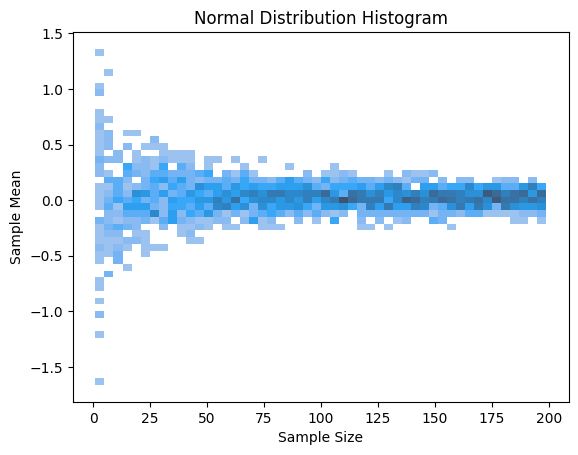

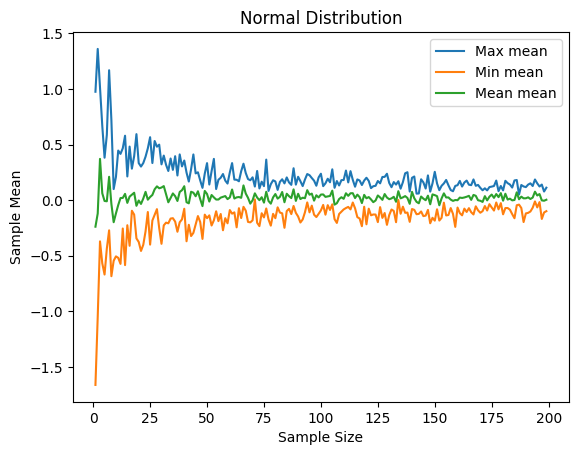

In [ ]:
x, y = sample_distribution(normal)
ax = sns.histplot(x=x, y=y, bins=50)
plt.title('Normal Distribution Histogram')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Sample Mean')
df = pd.DataFrame({'Sample Size': x, 'Sample Mean': y})
plot(df, 'Normal')

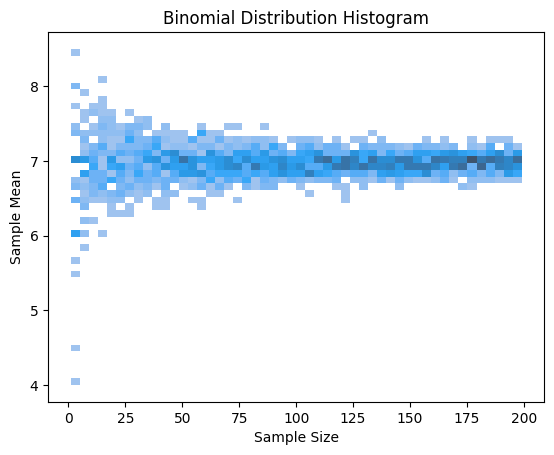

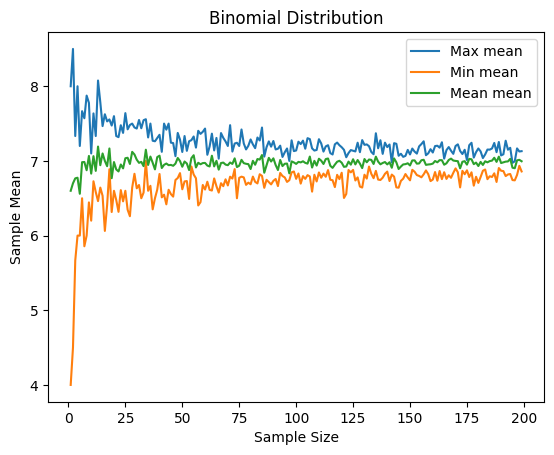

In [ ]:
x, y = sample_distribution(binomial_1)
ax = sns.histplot(x=x, y=y, bins=50)
plt.title('Binomial Distribution Histogram')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Sample Mean')
df = pd.DataFrame({'Sample Size': x, 'Sample Mean': y})
plot(df, 'Binomial')

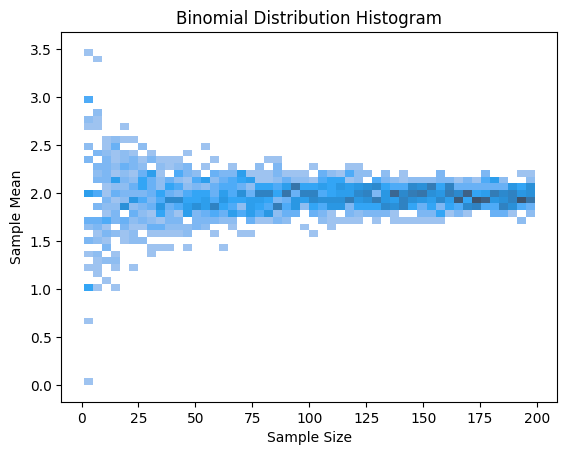

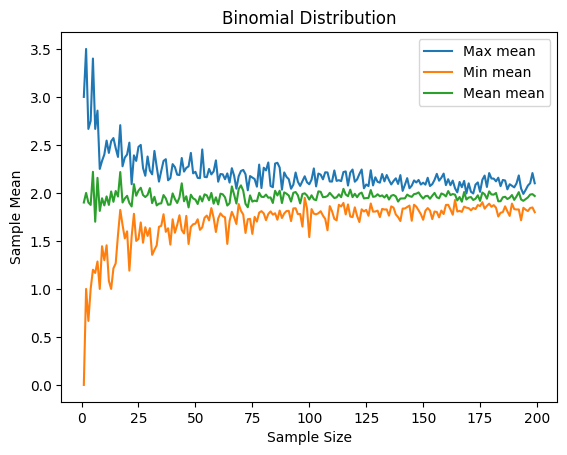

In [ ]:
x, y = sample_distribution(binomial_2)
ax = sns.histplot(x=x, y=y, bins=50)
plt.title('Binomial Distribution Histogram')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Sample Mean')
df = pd.DataFrame({'Sample Size': x, 'Sample Mean': y})
plot(df, 'Binomial')